# TP1a - Génération de variables aléatoires (Première partie)

## Estimation avancée - G3 SDIA

Dans ce TP, on s'intéresse à la génération de variables aléatoires, i.e., la capacité de produire des échantillons finis de variables ou vecteurs aléatoires d'une loi donnée. On suppose que l'on dispose d'un générateur de loi uniforme sur $[0,1]$ (avec Numpy, il est donné par $\texttt{np.random.rand}$). À partir de ce générateur, le but de ce TP sera de générer des échantillons d'autres lois, avec des méthodes simples, notamment la méthode de la *transformée inverse*. Des méthodes plus sophistiquées (acceptation-rejet, échantillonnage d'importance) seront présentées et étudiées à la séance suivante (après les vacances). Ce sera le sujet du TP-1b.

Pour chaque question, justifier la solution puis l'implémenter. Comparer avec la densité théorique à l'aide d'histogrammes ou de *kernel density estimates*.

### Instructions

1. Renommer votre notebook sous la forme `tp1a_Nom1_Nom2.ipynb`, et inclure le nom du binôme dans le notebook. 

2. Votre code, ainsi que toute sortie du code, doivent être commentés !

3. Déposer votre notebook sur Moodle dans la section prévue à cet effet avant la date limite : 8 Novembre 2023, 23h59.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KernelDensity

### Partie 1 - Pour s'échauffer : lois uniformes

**Q1**. À partir de $N$ échantillons d'une loi uniforme sur l'intervalle $[0,1]$, comment obtenir $N$ échantillons d'une loi uniforme sur l'intervalle $[a,b]$ ?

à partir d'un échantillon d'une loi uniforme sur $[0,1]$, on peut obtenir un échantillon d'une loi uniforme sur $[a,b]$ en utilisant la formule suivante : $X = a + (b-a)U$ où $U$ est un échantillon d'une loi uniforme sur $[0,1]$.

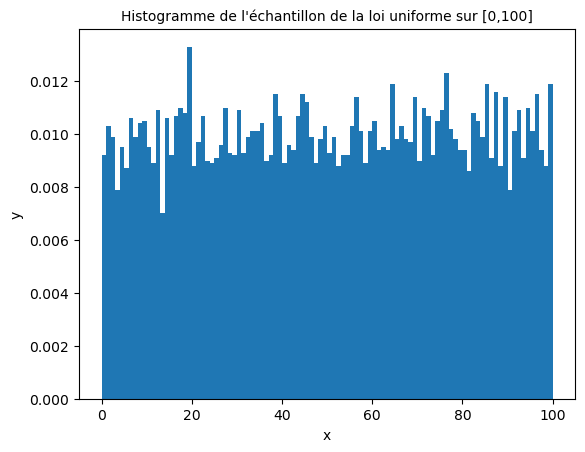

In [5]:
N = 10000
a = 0
b = 100
# Echantillon de la loi uniforme sur [0,1]
Echantillon01 = np.random.rand(N)
# Echantillon de la loi uniforme sur [a,b]
echantillonab = a + (b-a)*Echantillon01

hist = plt.hist(echantillonab, bins=b, density=True)
plt.xlabel('x')
plt.ylabel('y') 
plt.title('Histogramme de l\'échantillon de la loi uniforme sur [0,100]', fontsize=10)
plt.show()

**Q2**. Comment obtenir $N$ échantillons d'une loi uniforme sur le pavé $[a,b] \times [c,d]$ ?

Pour obtenir $N$ échantillons d'une loi uniforme sur le pavé $[a,b] \times [c,d]$, on peut utiliser la formule suivante : $(X,Y) = (a + (b-a)U, c + (d-c)V)$ où $U$ et $V$ sont des échantillons d'une loi uniforme sur $[0,1]$.

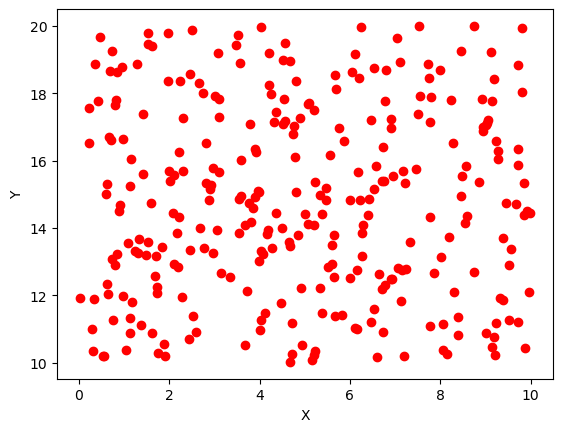

In [6]:
N = 300
a ,b,c,d= 0,10,10,20

# Echantillon de la loi uniforme sur [0,1]x[0,1]
U = np.random.rand(N)
V = np.random.rand(N)
# Echantillon de la loi uniforme sur [a,b]x[c,d]
X = a + (b-a)*U
Y = c + (d-c)*V

plt.scatter(X,Y, color='red')   
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

**Q3**. À partir de $N$ échantillons de loi uniforme sur l'intervalle $[0,1]$, comment obtenir $N$ échantillon de loi uniforme discrète sur $\{1, ..., K\}$ ?

On peut obtenir $N$ échantillons de loi uniforme discrète sur $\{1, ..., K\}$ à partir de $N$ échantillons de loi uniforme sur $[0,1]$ en utilisant la formule suivante : $X = \lfloor KU \rfloor + 1$ où $U$ est un échantillon d'une loi uniforme sur $[0,1]$.

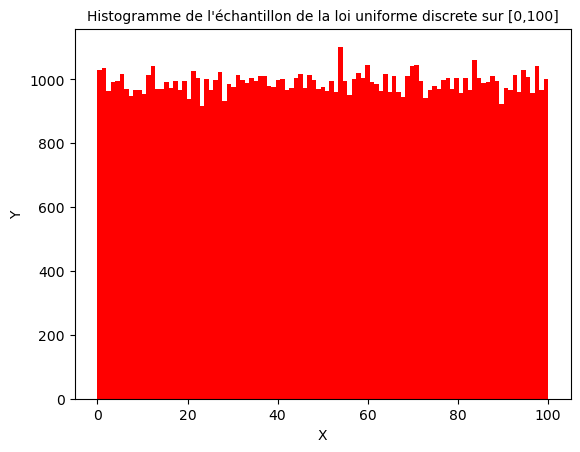

In [7]:
N = 100000
K = 100
# Echantillon de la loi uniforme sur [0,1]
U = np.random.rand(N)

X = np.zeros(N)
# Echantillon de la loi uniforme discrete sur [0,100]
X = [int(U[i]*(K+1)) for i in range(N)]

hist = plt.hist(X, bins=K+1, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Histogramme de l\'échantillon de la loi uniforme discrete sur [0,100]', fontsize=10)
plt.show()

### Partie 2 - Méthode de la transformée inverse

Soit $X$ une variable aléatoire réelle de fonction de répartition $F$ (rappel : $F$ est une fonction croissante de $\mathbb{R}$ dans $[0,1]$, et "càdlàg", mais pas nécessairement bijective). On définit la **fonction inverse généralisée** $F^{-1}$ de $F$ par :
$$\forall~u \in [0,1], F^{-1}(u) = \inf\{x \in \mathbb{R}, F(x) \geq u\}.$$

Cette fonction conïncide avec l'inverse classique quand $F$ est bijective (attention même si $F$ est continue elle n'est pas nécessairement bijective, il peut y avoir des plateaux).

**Q1**. Montrer la proposition suivante :

Si $U$ suit la loi uniforme sur l'intervalle $[0,1]$, alors la v.a. $F^{-1}(U)$ a pour fonction de répartition $F$ (et donc la même loi que $X$).

Cela donne donc la méthode de la **transformée inverse** ; Si l'on connait explicitement la fonction $F^{-1}$, on peut simuler de n'importe quelle variable aléatoire à partir d'un échantillon de loi uniforme.


Soit $x \in \mathbb{R}$, on a :
\begin{align*}
    P(F^{-1}(U) \leq x) &= P(U \leq F(x)) \\
    &= F(x)
\end{align*}
Donc $F^{-1}(U)$ a pour fonction de répartition $F$.


**Q2**. À l'aide de cette méthode, simuler $N$ échantillons d'une loi exponentielle de paramètre $\lambda$.

La fonction de répartition de la loi exponentielle de paramètre $\lambda$ est $F(x) = 1 - e^{-\lambda x}$ pour $x \geq 0$ et $F(x) = 0$ sinon. donc sa fonction de répartition inverse est $F^{-1}(u) = -\frac{1}{\lambda} \ln(1-u)$ pour $u \in [0,1[$ et $F^{-1}(u) = +\infty$ sinon.

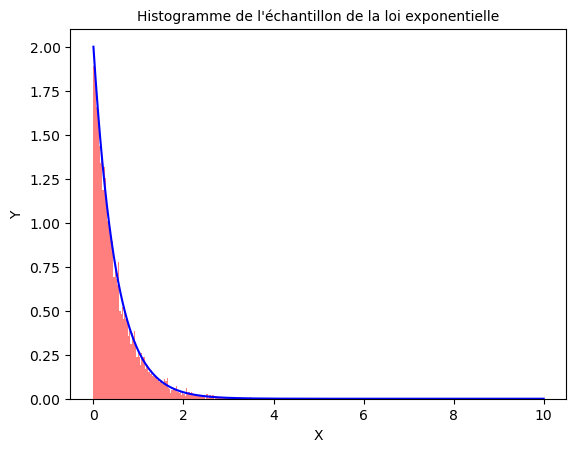

In [8]:
N = 10000
# Echantillon de la loi uniforme sur [0,1]
X = np.random.rand(N)

# Echantillon de la loi exponentielle de parametre lamda = 2
lamda = 2
expontielle = [(-1/lamda)*np.log(1-X[i]) for i in range(N)]
Hist_val,bins = np.histogram(expontielle,bins=200)
h = (bins.max()-bins.min())/200
plt.bar(bins[:-1],Hist_val/(N*h),width=h,color="red",alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Histogramme de l\'échantillon de la loi exponentielle', fontsize=10)
plt.plot(np.linspace(0, 10, 1000), lamda*np.exp(-lamda*np.linspace(0, 10, 1000)), color='blue')

**Q3**. À l'aide de cette méthode, simuler $N$ échantillons d'une loi de Cauchy (standard, i.e. $x_0 = 0, a = 1$).

La fonction de répartition de la loi de cauchy est $F(x) = \frac{1}{\pi} \arctan(x) + \frac{1}{2}$ donc sa fonction de répartition inverse est $F^{-1}(u) = \tan(\pi(u-\frac{1}{2}))$ pour $u \in ]0,1[$ et $F^{-1}(u) = +\infty$ sinon.

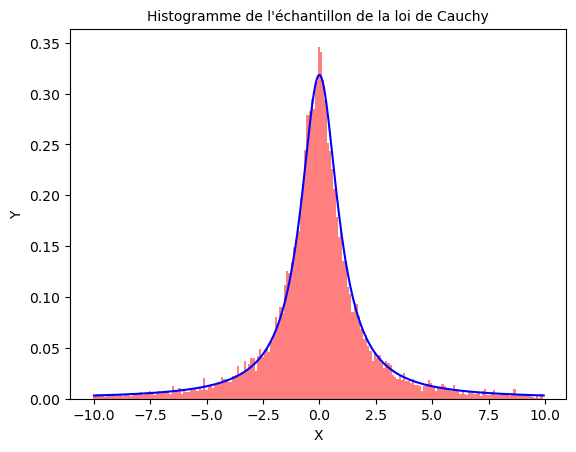

In [9]:
N = 20000
# Echantillon de la loi uniforme sur [0,1]
X = np.random.rand(N)
# Echantillon de la loi de Cauchy
cauchy = [np.tan(np.pi*(X[i]-0.5)) for i in range(N)]
# On affiche l'histogramme de l'échantillon de la loi de Cauchy sur [-10,10]
cauchy_visualisation = [cauchy[i] for i in range(N) if cauchy[i] < 10 and cauchy[i] > -10]
Hist_val,bins = np.histogram(cauchy_visualisation,bins=200)
h = (bins.max()-bins.min())/200
plt.bar(bins[:-1],Hist_val/(N*h),width=h,color="red",alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Histogramme de l\'échantillon de la loi de Cauchy', fontsize=10)
plt.plot(np.linspace(bins.min(), bins.max(), 500), 1/(np.pi*(1+np.linspace(bins.min(), bins.max(), 500)**2)), color='blue')
plt.show()

**Q4**. Quelles sont les limitations de la méthode de la transformée inverse ?

Les limitations de la méthode de la transformée inverse sont les suivantes :
- Il faut que la fonction de répartition soit inversible.
- Il faut que la fonction de répartition soit connue explicitement.


### Partie 3 - Transformation particulière : Méthode de Box-Müller

**Q1**. Soit $R \sim \text{Exp}(1/2)$ et $\Theta \sim U([0, 2 \pi])$ deux variables aléatoires indépendantes.

Montrer que $X = \sqrt{R} cos(\Theta)$ et $Y = \sqrt{R} sin(\Theta)$ sont deux variables indépendantes de loi $\mathcal{N}(0,1)$.

Cette méthode est connue comme la méthode de Box-Müller (1958), et est l'une des méthodes de référence pour générer des variables aléatoires normales.

Pour montrer que $X = \sqrt{R} \cos(\Theta)$ and $Y = \sqrt{R} \sin(\Theta)$ sont deux variables indépendantes de loi $\mathcal{N}(0,1)$,on va suivi ces trois étapes :

1. Trouver la fonction de densité de probabilité conjointe de $X$ et $Y$.
2. Trouver la fonction de densité de probabilité marginale de $X$ et $Y$.
3. Montrer que $X$ et $Y$ sont indépendantes.

On va voir cela en détail : 

1. Puisque $R$ et $\theta$ sont indépendates, la fonction de densité de probabilité conjointe de $R$ et $\theta$ est donnée par :

$$f_{R,\Theta}(r,\theta) = f_R(r) f_\Theta(\theta) = \frac{1}{2} e^{-\frac{1}{2}r} \frac{1}{2\pi}$$

On peut exprimer $X$ et $Y$ en fonction de $R$ et $\theta$ comme suit :

$$f_{X,Y}(x,y) = f_{R,\Theta}(r,\theta) \left|\frac{\partial(r,\theta)}{\partial(x,y)}\right|$$

Avec $\left|\frac{\partial(r,\theta)}{\partial(x,y)}\right|$ est le jacobien de la transformation $(R,\Theta)$ à $(X,Y)$. On a:

$$\left|\frac{\partial(r,\theta)}{\partial(x,y)}\right| = \begin{vmatrix} \frac{\partial r}{\partial x} & \frac{\partial r}{\partial y} \\ \frac{\partial \theta}{\partial x} & \frac{\partial \theta}{\partial y} \end{vmatrix} = \begin{vmatrix} \frac{\cos(\theta)}{2\sqrt{r}} & \frac{\sin(\theta)}{2\sqrt{r}} \\ -\frac{\sin(\theta)}{2r} & \frac{\cos(\theta)}{2r} \end{vmatrix} = \frac{1}{2r}$$

Alos on a:

$$f_{X,Y}(x,y) = \frac{1}{4\pi} e^{-\frac{x^2+y^2}{2}}$$

2. Pour trouver la fonction de densité de probabilité marginale de $X$ et $Y$, on peut utiliser la formule suivante :

$$f_X(x) = \int_{-\infty}^\infty f_{X,Y}(x,y) dy = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}$$

et

$$f_Y(y) = \int_{-\infty}^\infty f_{X,Y}(x,y) dx = \frac{1}{\sqrt{2\pi}} e^{-\frac{y^2}{2}}$$

Donc $X$ et $Y$ sont deux variables aléatoires de loi $\mathcal{N}(0,1)$.

3. Pour montrer que $X$ et $Y$ sont indépendantes, on peut utiliser la formule suivante :

$$f_{X,Y}(x,y) = \frac{1}{4\pi} e^{-\frac{x^2+y^2}{2}} = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} \cdot \frac{1}{\sqrt{2\pi}} e^{-\frac{y^2}{2}} = f_X(x) f_Y(y)$$

Donc $X$ et $Y$ sont indépendantes.

**Q2**. En déduire une façon de générer un $N$ échantillons de loi normale $\mathcal{N}(0,1)$ à partir d'échantillons d'une loi uniforme sur l'intervalle $[0,1]$.

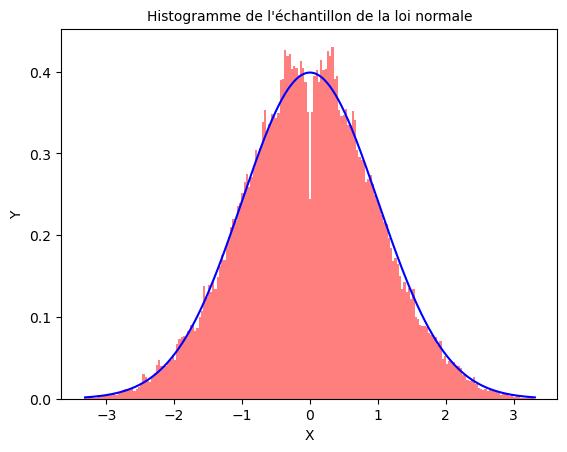

In [11]:
N = 700
U = np.random.rand(N)
# on utilise la méthode de transformation inverse pour calculer R et theta
lamda = 1/2
R = [(-1/lamda)*np.log(1-U[i]) for i in range(N)]
theta = [2*np.pi*U[i] for i in range(N)]
# On utilise la méthode de Box-Muller pour calculer X
X = [np.sqrt(R[i])*np.cos(theta[j]) for i in range(N) for j in range(N)]
# on affiche l'histogramme de X
Hist_val,bins = np.histogram(X,bins=200)
h = (bins.max()-bins.min())/200
plt.bar(bins[:-1],Hist_val/(h*N**2),width=h,color="red",alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Histogramme de l\'échantillon de la loi normale', fontsize=10)
plt.plot(np.linspace(bins.min(), bins.max(), 500), (1/np.sqrt(2*np.pi))*np.exp(-np.linspace(bins.min(), bins.max(), 500)**2/2), color='blue')
plt.show()

**Q3**. À partir de $N$ échantillons de loi $\mathcal{N}(0,1)$, comment obtenir un $N$ échantillons de loi $\mathcal{N}(\mu, \sigma^2)$ ?

On peut obtenir un $N$ échantillons de loi $\mathcal{N}(\mu, \sigma^2)$ à partir de $N$ échantillons de loi $\mathcal{N}(0,1)$ en utilisant la formule suivante : $Z = \mu + \sigma X$ où $X$ est un échantillon de loi $\mathcal{N}(0,1)$.

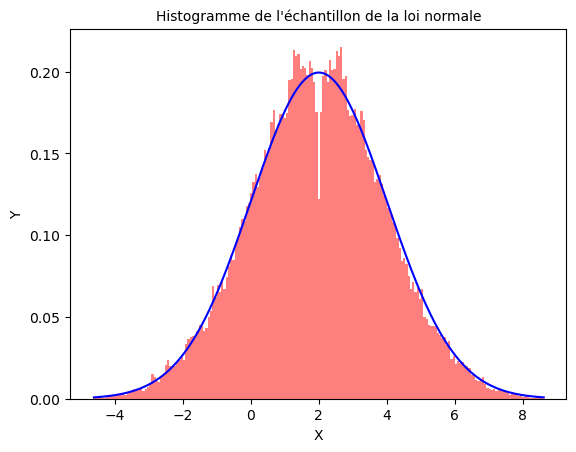

In [12]:
mu = 2
sigma = 2
Z = mu+sigma*np.array(X)
Hist_val,bins = np.histogram(Z,bins=200)
h = (bins.max()-bins.min())/200
plt.bar(bins[:-1],Hist_val/(h*N**2),width=h,color="red",alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Histogramme de l\'échantillon de la loi normale', fontsize=10)
plt.plot(np.linspace(bins.min(), bins.max(), 500), (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(np.linspace(bins.min(), bins.max(), 500)-mu)**2/(2*sigma**2)), color='blue')
plt.show()

**Q4**. On s'intéresse maintenant à la simulation d'un **vecteur** gaussien en dimension $d$.

Expliquer pourquoi la méthode de Box-Müller permet de simuler des vecteurs de loi $\mathcal{N_d}(\mathbf{0}_d, I_d)$.

Soit $X \sim \mathcal{N_d}(\mathbf{0}_d, I_d)$, $\mathbf{m} \in \mathbb{R}^d$, et $\boldsymbol{\Sigma} \in \mathbb{R}^{d \times d}$ symétrique définie positive. On suppose qu'il existe $\mathbf{L} \in \mathbb{R}^{d \times d}$ tel que $\boldsymbol{\Sigma} = \mathbf{L} \mathbf{L}^{\top}$. À l'aide des propriétés des vecteurs gaussiens, montrer que $Y = m + \mathbf{L}X \sim \mathcal{N_d}(\mathbf{m}, \boldsymbol{\Sigma})$.

La méthode de Box-Müller permet de simuler des vecteurs de loi $\mathcal{N_d}(\mathbf{0}_d, I_d)$ car elle permet de simuler des variables aléatoires indépendantes de loi $\mathcal{N}(0,1)$ et que les composantes d'un vecteur gaussien sont indépendantes.

Pour montrer que la variable aléatoire $Y = \mathbf{m} + \mathbf{L}X$ suit une distribution normale multivariée $\mathcal{N}_d(\mathbf{m}, \boldsymbol{\Sigma})$. Tout d'abord $X$ suit une distribution normale multivariée $\mathcal{N}_d(\mathbf{0}_d, I_d)$, ce qui signifie que sa densité de probabilité est donnée par :

$$f_X(x) = \frac{1}{(2\pi)^{d/2} \det(I_d)^{1/2}} e^{-\frac{1}{2}x^T I_d^{-1} x},$$

où $I_d$ est la matrice identité $d \times d$ et $\det(I_d) = 1$. Donc, la densité de probabilité de $X$ est :

$$f_X(x) = \frac{1}{(2\pi)^{d/2}} e^{-\frac{1}{2}x^T x}.$$

Nous savons également que $\boldsymbol{\Sigma} = \mathbf{L} \mathbf{L}^{\top}$, où $\mathbf{L}$ est une matrice triangulaire inférieure. Donc, nous pouvons écrire $\boldsymbol{\Sigma}$ sous forme matricielle comme suit :

$$\boldsymbol{\Sigma} = \mathbf{L} \mathbf{L}^{\top}.$$

Maintenant, considérons la variable aléatoire $Y = \mathbf{m} + \mathbf{L}X$. Pour trouver la densité de probabilité de $Y$, nous pouvons utiliser la méthode de transformation. La densité de probabilité de $Y$ est donnée par :

$$f_Y(y) = f_X(\mathbf{L}^{-1}(y - \mathbf{m})).$$

Ici, nous avons utilisé le fait que $\mathbf{L}^{-1}$ existe car $\mathbf{L}$ est une matrice triangulaire inférieure. Donc, nous pouvons inverser $\mathbf{L}$.

Maintenant, substituons $x = \mathbf{L}^{-1}(y - \mathbf{m})$ dans la densité de probabilité de $X$ :

$$f_Y(y) = \frac{1}{(2\pi)^{d/2}} e^{-\frac{1}{2}(\mathbf{L}^{-1}(y - \mathbf{m}))^T (\mathbf{L}^{-1}(y - \mathbf{m}))}.$$

Nous pouvons simplifier cette expression en utilisant la propriété $\boldsymbol{\Sigma} = \mathbf{L} \mathbf{L}^{\top}$, ce qui implique que $\boldsymbol{\Sigma}^{-1} = (\mathbf{L}^{\top})^{-1} \mathbf{L}^{-1}$ :

$$f_Y(y) = \frac{1}{(2\pi)^{d/2}} e^{-\frac{1}{2}(y - \mathbf{m})^T \boldsymbol{\Sigma}^{-1} (y - \mathbf{m})}.$$

Maintenant, nous pouvons voir que la densité de probabilité de $Y$ est celle d'une variable aléatoire gaussienne multivariée $\mathcal{N}_d(\mathbf{m}, \boldsymbol{\Sigma})$. Ainsi, nous avons montré que $Y \sim \mathcal{N}_d(\mathbf{m}, \boldsymbol{\Sigma})$.

**Q5**. On peut montrer qu'une telle matrice $\mathbf{L}$ existe toujours. C'est la **décomposition de Cholesky** ($\mathbf{L}$ est triangulaire inférieure), qui est fondamentale en statistique et *machine learning*. Elle tire son nom d'André-Louis Cholesky, ingénieur polytechnicien, mort pendant la première guerre mondiale (résultat publié de manière posthume en 1924). À noter que le coût de calcul de cette décomposition est $\mathcal{O}(d^3)$ !

À partir de $N$ échantillons de loi $\mathcal{N_d}(\mathbf{0}_d, I_d)$, générer $N$ échantillons de loi $\mathcal{N_d}(\mathbf{m}, \boldsymbol{\Sigma})$. Prendre $d=2$ et utiliser $\texttt{np.linalg.cholesky}$.

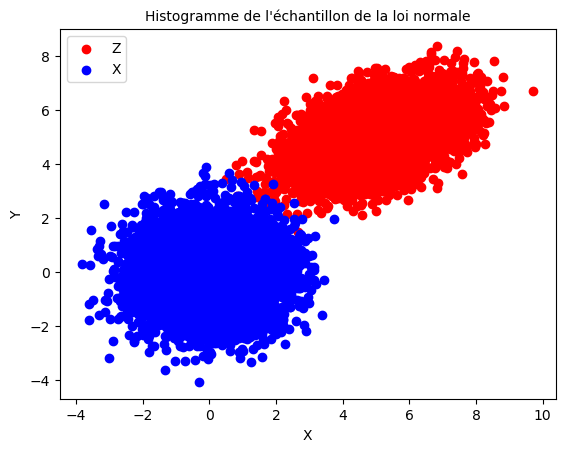

In [13]:
N = 10000
X_2D_normale = np.random.randn(N,2)
sigma = np.array([[1,0.5],[0.5,1]])
mu = np.array([5,5])
L = np.linalg.cholesky(sigma)
Z = np.dot(X_2D_normale,L)+mu
plt.scatter(Z[:,0],Z[:,1], color='red',label='Z')
plt.scatter(X_2D_normale[:,0],X_2D_normale[:,1], color='blue',label='X')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Histogramme de l\'échantillon de la loi normale', fontsize=10)
plt.legend()
plt.show()